In [1]:
import pickle
import pandas as pd


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = [20, 10]

# evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# custom functions
import sys
sys.path.append(r"C:\Users\User\Documents\projects\LHL_final_project_influenza_forecasting\src")
from evaluate_model import *

In [2]:
df_time_features_pre_COVID = pickle.load(open(r"..\data\flu_cases\df_time_features_pre_COVID.pkl", "rb" ))
df_time_features = pickle.load(open(r"..\data\flu_cases\df_time_features.pkl", "rb" ))

In [3]:
df_time_features_pre_COVID.head()

,y1,y2,y3,y4,t - 1,t - 2,t - 3,t - 4,t - 5,t - 6,...,month_4,month_5,month_6,month_7,month_8,month_9,season_Fall,season_Spring,season_Summer,season_Winter
0,9.0,18.0,15.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,1,0,0,0
1,18.0,15.0,29.0,59.0,9.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,1,0,0,0
2,15.0,29.0,59.0,50.0,18.0,9.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,1,0,0,0
3,29.0,59.0,50.0,37.0,15.0,18.0,9.0,NaN,NaN,NaN,...,0,0,0,0,0,1,1,0,0,0
4,59.0,50.0,37.0,26.0,29.0,15.0,18.0,9.0,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0


In [4]:
df_time_features_pre_COVID.columns

Index(['y1', 'y2', 'y3', 'y4', 't - 1', 't - 2', 't - 3', 't - 4', 't - 5',
       't - 6', 't - 7', 'this week last year', 'two-week moving average',
       'expanding mean', 'year_2015', 'year_2016', 'year_2017', 'year_2018',
       'year_2019', 'year_2020', 'year_2021', 'year_2022', 'month_1',
       'month_10', 'month_11', 'month_12', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'season_Fall',
       'season_Spring', 'season_Summer', 'season_Winter'],
      dtype='object')

In [5]:
df_time_features_pre_COVID.dropna(inplace=True)
df_time_features_pre_COVID = df_time_features_pre_COVID.reset_index(drop=True)
df_time_features_pre_COVID = df_time_features_pre_COVID.drop(columns=['year_2016', 'year_2017', 'year_2018', 'year_2019',
       'year_2020', 'year_2021', 'year_2022', 'month_10', 'month_11',
       'month_12', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9','year_2015', 'month_1',])

In [6]:
df_time_features_pre_COVID.columns

Index(['y1', 'y2', 'y3', 'y4', 't - 1', 't - 2', 't - 3', 't - 4', 't - 5',
       't - 6', 't - 7', 'this week last year', 'two-week moving average',
       'expanding mean', 'season_Fall', 'season_Spring', 'season_Summer',
       'season_Winter'],
      dtype='object')

In [7]:
train_size = int(len(df_time_features_pre_COVID) *.7)
test_size = len(df_time_features_pre_COVID) - train_size
train, test = df_time_features_pre_COVID[0:train_size], df_time_features_pre_COVID[train_size:len(df_time_features_pre_COVID)]

In [8]:
train_y = train[['y1','y2','y3','y4']]
train_X = train.drop(columns=['y1','y2','y3','y4'])
test_y = test[['y1','y2','y3','y4']]
test_X = test.drop(columns=['y1','y2','y3','y4'])

In [9]:
features = train_X.columns

,Model,Dataset,Weeks-ahead Forecast,MSE_train,MSE_test,RMSE_train,RMSE_test,MAE_train,MAE_test,R2_train,R2_test
0,RF_test,Pre-COVID,1,10302.8,80629.5,101.5,283.95,55.53,168.86,0.994326,0.961169
0,RF_test,Pre-COVID,2,17799.52,225825.02,133.41,475.21,73.99,270.08,0.99016,0.895611
0,RF_test,Pre-COVID,3,24242.88,414446.0,155.7,643.77,90.56,383.59,0.98655,0.813147
0,RF_test,Pre-COVID,4,32450.11,516137.77,180.14,718.43,105.27,448.67,0.981944,0.767106


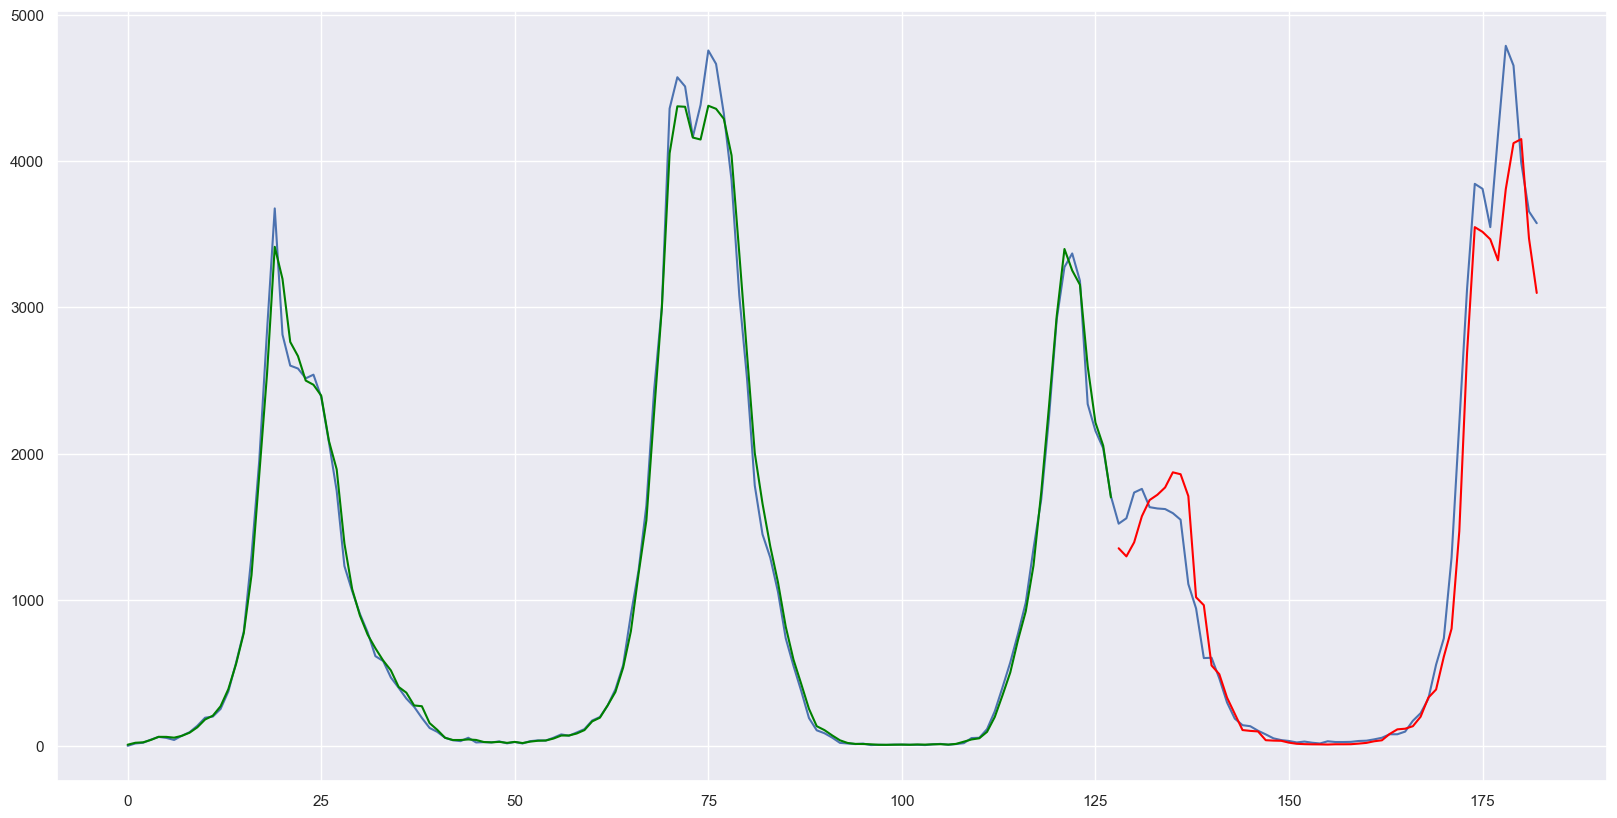

In [10]:
numeric_transform = Pipeline([('scaling', MinMaxScaler())])

preprocessing = ColumnTransformer([('numeric', numeric_transform, ['t - 1', 't - 2', 't - 3', 't - 4', 't - 5',
       't - 6', 't - 7', 'this week last year', 'two-week moving average',
       'expanding mean'])])

pipeline = Pipeline(steps=[('preprocessing', preprocessing), 
                          ('model', RandomForestRegressor(random_state=2023))])

pipeline.fit(train_X, train_y)

preds_test = pipeline.predict(test_X)
preds_test_df = pd.DataFrame(preds_test,columns=test_y.columns)
preds_train = pipeline.predict(train_X)
preds_train_df = pd.DataFrame(preds_train,columns=train_y.columns)

# evaluate
# r2 = pipeline.score(test_X, test_y)
# print(f'Test set r^2: {r2}')

# MSE_train = round(mean_squared_error(train_y['y1'], preds_train_df['y1']),3)
# RMSE_train = round(mean_squared_error(train_y['y1'], preds_train_df['y1'], squared=False),3)
# MAE_train = round(mean_absolute_error(train_y['y1'], preds_train_df['y1']),3)
# print(f'MSE_train: {MSE_train}')
# print(f'RMSE_train: {RMSE_train}')
# print(f'MAE_train: {MAE_train}')

# MSE_test = round(mean_squared_error(test_y['y1'], preds_test_df['y1']),3)
# RMSE_test = round(mean_squared_error(test_y['y1'], preds_test_df['y1'], squared=False),3)
# MAE_test = round(mean_absolute_error(test_y['y1'], preds_test_df['y1']),3)
# print(f'MSE_test: {MSE_test}')
# print(f'RMSE_test: {RMSE_test}')
# print(f'MAE_test: {MAE_test}')

for i in range(1,5):
    results_matrix = evaluate_model(train=train_y, test=test_y, preds_train=preds_train, preds_test=preds_test, dataset='Pre-COVID', forecast_weeks=i, model='RF_test')

# plot
plt.plot(df_time_features_pre_COVID.index, df_time_features_pre_COVID['y1'].values)
plt.plot(df_time_features_pre_COVID.index[:train_size], preds_train_df['y1'], color='green')
plt.plot(df_time_features_pre_COVID.index[train_size:], preds_test_df['y1'], color='red')

results_matrix

In [11]:
results_matrix

,Model,Dataset,Weeks-ahead Forecast,MSE_train,MSE_test,RMSE_train,RMSE_test,MAE_train,MAE_test,R2_train,R2_test
0,RF_test,Pre-COVID,1,10302.8,80629.5,101.5,283.95,55.53,168.86,0.994326,0.961169
0,RF_test,Pre-COVID,2,17799.52,225825.02,133.41,475.21,73.99,270.08,0.99016,0.895611
0,RF_test,Pre-COVID,3,24242.88,414446.0,155.7,643.77,90.56,383.59,0.98655,0.813147
0,RF_test,Pre-COVID,4,32450.11,516137.77,180.14,718.43,105.27,448.67,0.981944,0.767106
